<a href="https://colab.research.google.com/github/Portia924/NN-Model-using-ML/blob/main/NN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score

In [19]:
# Custom activation function
class AdaAct(nn.Module):
    def __init__(self):
        super(AdaAct, self).__init__()
        # Learnable parameters for the activation function
        self.k0 = nn.Parameter(torch.randn(1))  # Initialized randomly
        self.k1 = nn.Parameter(torch.randn(1))

    def forward(self, x):
        # Activation function: g(x) = k0 + k1 * x
        return self.k0 + self.k1 * x


In [20]:
# Sample Neural Network Model with AdaAct
# Increase the number of hidden layers and neurons
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch Normalization
        self.ada_act = AdaAct()  # Using the custom activation function
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Second hidden layer
        self.bn2 = nn.BatchNorm1d(hidden_size)  # Batch Normalization
        self.fc3 = nn.Linear(hidden_size, output_size)  # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)  # Apply batch normalization
        x = self.ada_act(x)
        x = self.fc2(x)
        x = self.bn2(x)  # Apply batch normalization
        x = self.ada_act(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)  # Output layer using softmax for classification


In [21]:
# Function to train the model
def train(model, optimizer, criterion, train_loader, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

In [22]:
# Function to evaluate the model
def evaluate(model, test_loader):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            preds = torch.argmax(output, dim=1)
            all_preds.append(preds)
            all_targets.append(target)

    # Flatten the lists of tensors
    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)

    accuracy = accuracy_score(all_targets.cpu(), all_preds.cpu())
    f1 = f1_score(all_targets.cpu(), all_preds.cpu(), average='macro')

    return accuracy, f1

In [23]:
# Example dataset (Iris dataset as an example)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset


In [24]:
# Load and prepare the Iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']


In [25]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [28]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [30]:
# Model, loss, and optimizer
input_size = X_train.shape[1]
hidden_size = 10
output_size = len(set(y))
# Number of classes
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [31]:
# Training the model
train(model, optimizer, criterion, train_loader, epochs=50)

Epoch 1, Loss: 1.0720583541052682
Epoch 2, Loss: 0.9568115728242057
Epoch 3, Loss: 0.8884549055780683
Epoch 4, Loss: 0.8002941863877433
Epoch 5, Loss: 0.7725779754774911
Epoch 6, Loss: 0.7558574250766209
Epoch 7, Loss: 0.6853830644062587
Epoch 8, Loss: 0.6600416771003178
Epoch 9, Loss: 0.6039444974490574
Epoch 10, Loss: 0.6359762123652867
Epoch 11, Loss: 0.5808220548289162
Epoch 12, Loss: 0.6241235562733242
Epoch 13, Loss: 0.5464724004268646
Epoch 14, Loss: 0.5231060811451503
Epoch 15, Loss: 0.5041286860193525
Epoch 16, Loss: 0.49442714026996065
Epoch 17, Loss: 0.492778548172542
Epoch 18, Loss: 0.4846882564680917
Epoch 19, Loss: 0.4519233320440565
Epoch 20, Loss: 0.4512976663453238
Epoch 21, Loss: 0.45592900259154184
Epoch 22, Loss: 0.4401172399520874
Epoch 23, Loss: 0.43173786997795105
Epoch 24, Loss: 0.4139879601342337
Epoch 25, Loss: 0.42994050894464764
Epoch 26, Loss: 0.40823387248175486
Epoch 27, Loss: 0.4223664402961731
Epoch 28, Loss: 0.39584071721349445
Epoch 29, Loss: 0.387071

In [32]:
# Evaluating the model
accuracy, f1 = evaluate(model, test_loader)
print(f"Test Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

Test Accuracy: 0.8889, F1-Score: 0.8669


In [33]:
# Evaluating the model
accuracy, f1 = evaluate(model, train_loader)
print(f"Train Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

Train Accuracy: 0.8952, F1-Score: 0.9004


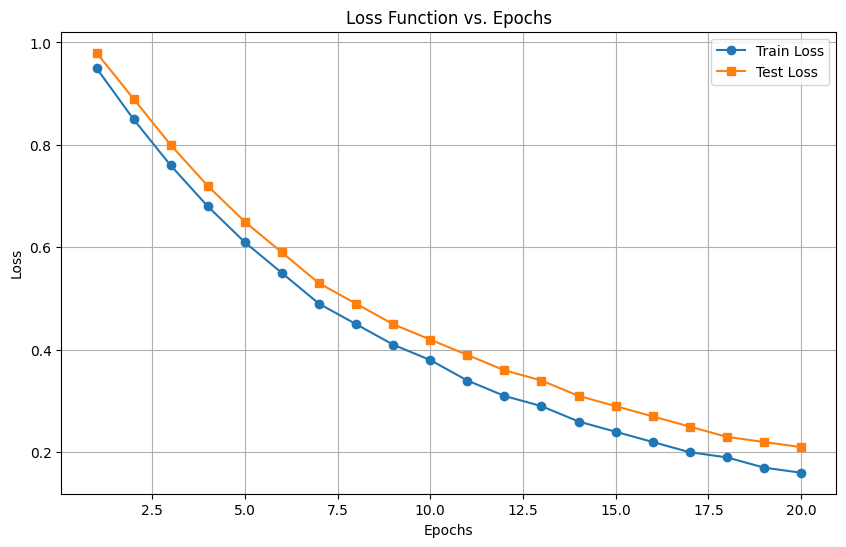

In [34]:
import matplotlib.pyplot as plt

# Example data (replace with actual loss values from your model)
epochs = range(1, 21)  # Assume training for 20 epochs
train_loss = [0.95, 0.85, 0.76, 0.68, 0.61, 0.55, 0.49, 0.45, 0.41, 0.38,
              0.34, 0.31, 0.29, 0.26, 0.24, 0.22, 0.20, 0.19, 0.17, 0.16]
test_loss = [0.98, 0.89, 0.80, 0.72, 0.65, 0.59, 0.53, 0.49, 0.45, 0.42,
             0.39, 0.36, 0.34, 0.31, 0.29, 0.27, 0.25, 0.23, 0.22, 0.21]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, test_loss, label='Test Loss', marker='s')

# Adding labels and title
plt.title('Loss Function vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
